In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import sys
sys.path.append("../scripts")
sys.path.append(os.path.abspath("../scripts"))
from data_loader import load_dataset
sys.path.append(os.path.abspath("../src"))
from cleaning import cleaning_data

In [11]:
data_path='../Data/MachineLearningRating_v3.txt'
#//Loading dataset
dataset=load_dataset(data_path)
#df=pd.read_csv(data_path, sep='|', low_memory=False)
#df.columns = df.columns.str.strip()

Dataset loaded successfully!


Performing Descriptive Statistics

In [12]:
dataset.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


Checking the number of missing values in each variables 

In [38]:
missing_value_count=dataset.isnull().sum()

In [41]:
top_missing_values = missing_value_count.sort_values(ascending=False)
top_missing_values

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
make                            552
mmcode                          552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
VehicleIntroDate                552
cubiccapacity                   552
CapitalOutstanding                2
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

from the above result, we can understand that the following features are the top 10 columns with missing values along with the number of missing values 
1. NumberOfVehiclesInFleet     1000098
2. CrossBorder                  999400
3. CustomValueEstimate          779642
4. Rebuilt                      641901
5. Converted                    641901
6. WrittenOff                   641901
7. NewVehicle                   153295
8. Bank                         145961
9. AccountType                   40232
10. Gender                         9536
11. MaritalStatus                8259

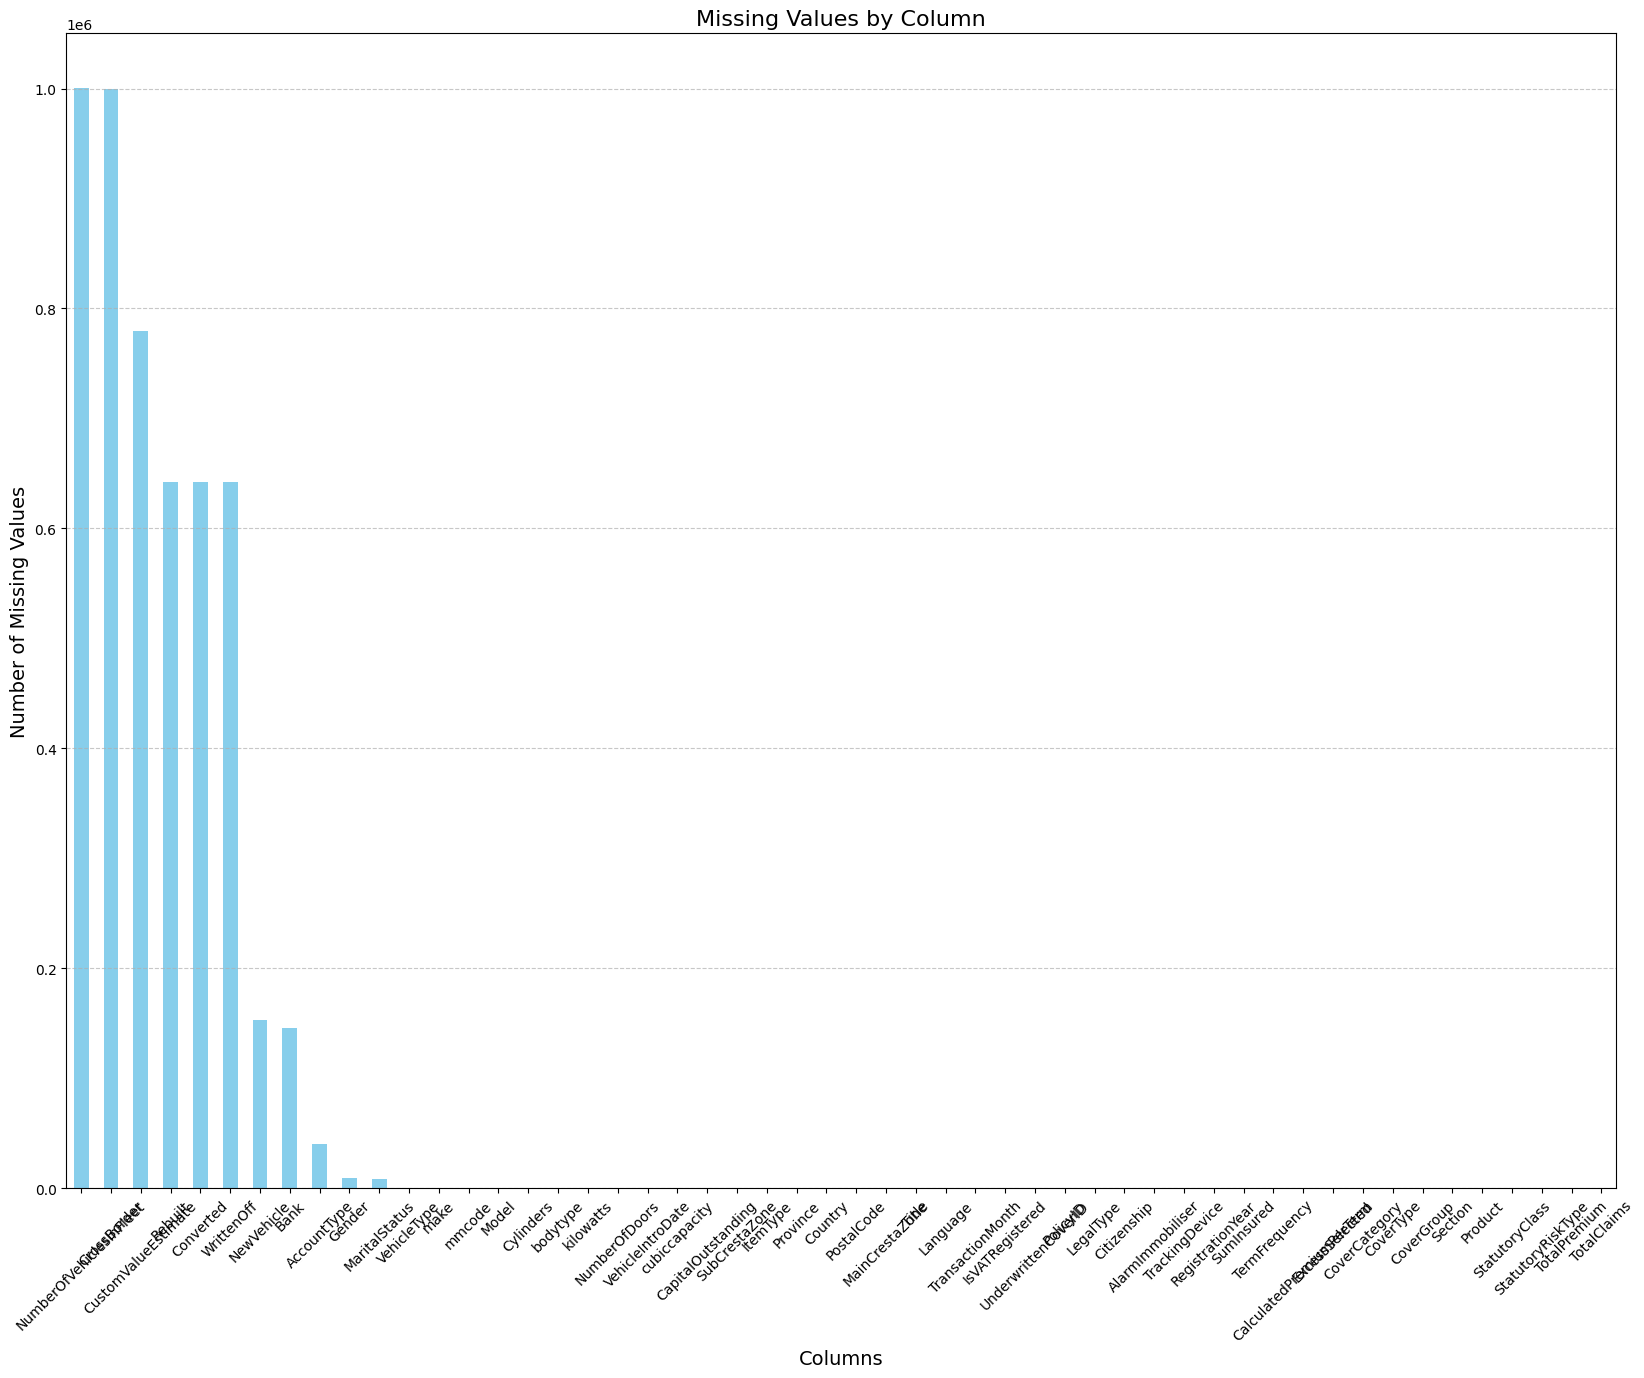

In [44]:
plt.figure(figsize=(20, 15))
top_missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values by Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Number of Missing Values", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Removing a rows with missing values 

In [14]:
dataset.shape

(1000098, 52)

In [19]:
dataset.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


changing the dataset into panda dataframe 

In [29]:
dataset=pd.DataFrame(dataset)

check for the data types of each attributes

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [32]:
df_cleaned = dataset.dropna(axis=1)
removed_columns = set(dataset.columns) - set(df_cleaned.columns)
print(f"Removed columns: {removed_columns}")

Removed columns: {'make', 'cubiccapacity', 'WrittenOff', 'MaritalStatus', 'Rebuilt', 'mmcode', 'CrossBorder', 'NumberOfVehiclesInFleet', 'Bank', 'VehicleIntroDate', 'VehicleType', 'NumberOfDoors', 'NewVehicle', 'Converted', 'Gender', 'CustomValueEstimate', 'Model', 'Cylinders', 'kilowatts', 'bodytype', 'AccountType', 'CapitalOutstanding'}


In [36]:
df_cleaned.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
RegistrationYear            0
AlarmImmobiliser            0
TrackingDevice              0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSelected              0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
StatutoryClass              0
StatutoryRiskType           0
TotalPremium                0
TotalClaims                 0
dtype: int64

In [37]:
new_data=dataset.to_csv("New_Data.csv")